### Complete Practical Time Series Analysis
- Module: Linear Regression
- [Udemy](www.datascienceanywhere.com/udemy/timeseriesforecast)

In [1]:
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# setting path
os.chdir('drive/My Drive/Time series Analysis/')

In [4]:
ls

 B2.xlsx                              'Part 1 Linear Regression time series.ipynb'
 B.xlsx                               'Part 2 Regression with Time.ipynb'
'Copy of Regression with Time.ipynb'   Tutorial_1
 C.xlsx                                Tutorial_2
 D.csv


# Exploratory Data Analysis

In [5]:

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Change to your desired folder
os.chdir('/content/drive/My Drive/Time series Analysis/')

# Load your Excel file
df = pd.read_excel('C.xlsx')
print(df)
print(df.info())
print(df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       x      y
0   1.42   1.70
1   1.86   7.80
2   1.48   2.05
3   3.14  12.30
4   2.21   9.35
5   1.96   2.80
6   1.20   2.40
7   1.90   2.40
8   4.09  14.40
9   2.98   9.59
10  2.19   3.00
11  1.84   1.50
12  2.18  13.60
13  1.33   3.10
14  2.18   2.00
15  2.22   6.80
16  2.24   1.20
17  1.62   2.20
18  1.32   2.60
19  1.85   5.40
20  1.85   3.90
21  2.70   5.90
22  3.60  10.90
23  4.60  17.80
24  1.38   1.70
25  2.34   3.20
26  2.71  14.30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       27 non-null     float64
 1   y       27 non-null     float64
dtypes: float64(2)
memory usage: 560.0 bytes
None
(27, 2)


## Quantitative Technique
- Central Tendencies
- Measure of Spread

In [6]:
# shape
df.shape

(27, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       27 non-null     float64
 1   y       27 non-null     float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [8]:
print(df.mean())
print(df.median())
print(df.mode())

x    2.236667
y    6.070000
dtype: float64
x    2.18
y    3.20
dtype: float64
      x    y
0  1.85  1.7
1  2.18  2.4


In [9]:
# measure of spread
# variance of the
print(df.var())
print(df.std())

x     0.714815
y    24.310415
dtype: float64
x    0.845468
y    4.930559
dtype: float64


In [10]:
# describe
df.describe()

,x,y
count,27.000000,27.000000
mean,2.236667,6.070000
std,0.845468,4.930559
min,1.200000,1.200000
25%,1.730000,2.300000
50%,2.180000,3.200000
75%,2.520000,9.470000
max,4.600000,17.800000


### Graphical Method

<ipython-input-11-ad889f1f2be4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['x'])


<Axes: xlabel='x', ylabel='Density'>

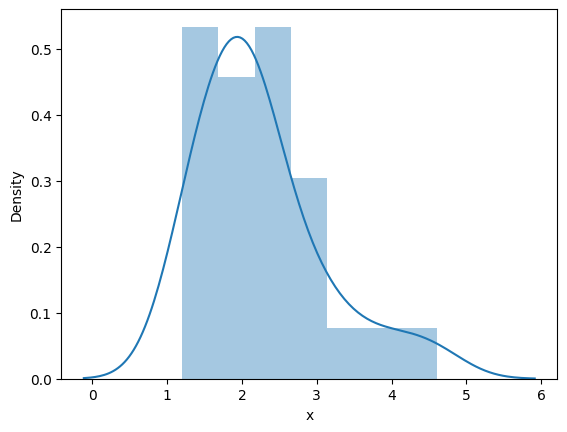

In [11]:
sns.distplot(df['x'])

<ipython-input-53-f23de106ce73>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['y'])


<Axes: xlabel='y', ylabel='Density'>

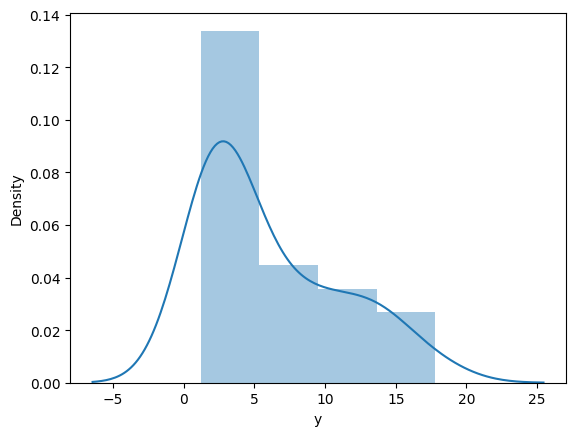

In [ ]:
sns.distplot(df['y'])

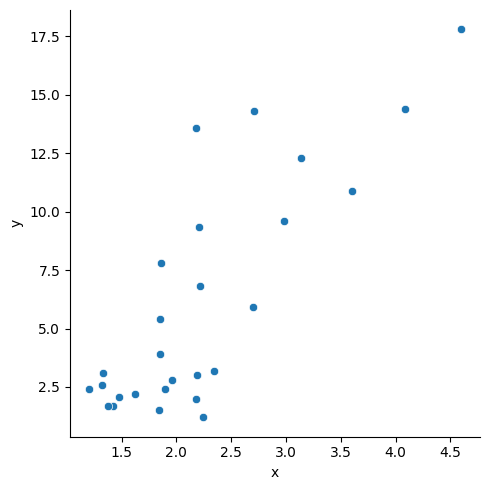

In [ ]:
# relationship plot
sns.relplot(x='x',y='y',data=df)

<Axes: xlabel='x', ylabel='y'>

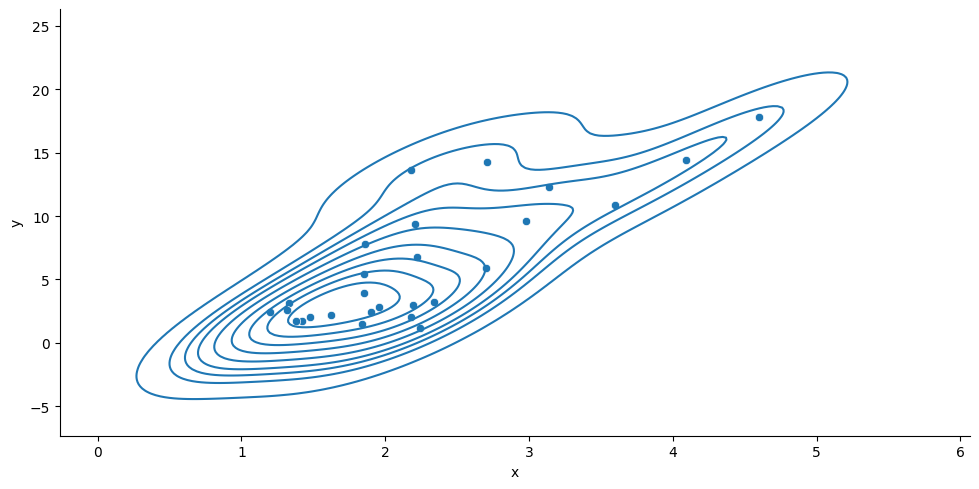

In [12]:

import seaborn as sns

# Relplot with aspect ratio
sns.relplot(x='x', y='y', data=df, aspect=2)

# KDE plot with corrected parameters
sns.kdeplot(x=df['x'], y=df['y'])

<Axes: >

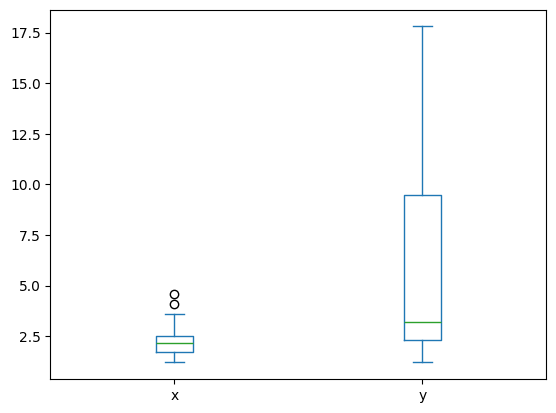

In [ ]:
df.plot(kind='box')

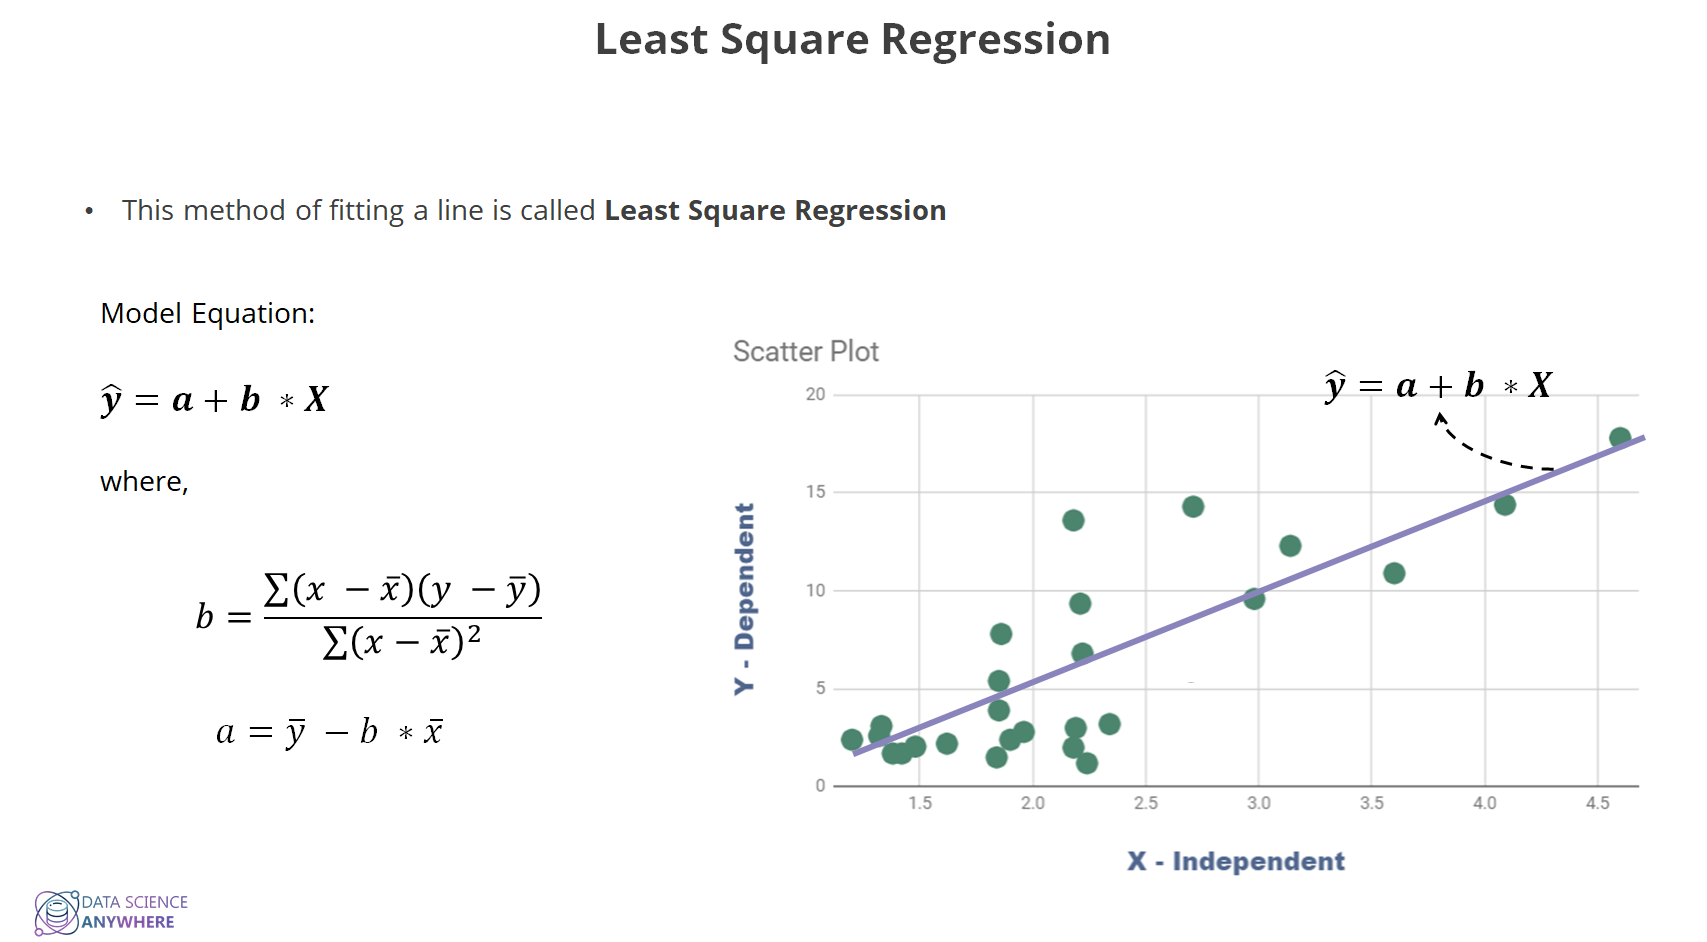

In [17]:
df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


In [18]:
# slope of the line b
# b = cov(x,y) / var(x)
cov = df.cov()
cov

,x,y
x,0.714815,3.390746
y,3.390746,24.310415


In [19]:
b = cov['x']['y'] / cov['x']['x']
print('Slope of the line =',b)

Slope of the line = 4.743527107590986


In [20]:
# intercept of the line a
# a = mean(y) - b * mean(x)
a = df['y'].mean() - b * df['x'].mean()
print('Intercept of the line = ',a)

Intercept of the line =  -4.539688963978507


In [14]:
def model_equation(x):
  y_hat = a + b * x
  return y_hat

In [21]:
model_equation(3)

9.690892358794454

In [23]:
y_pred = model_equation(df['x'])
y_pred

,x
0,2.196120
1,4.283271
2,2.480731
3,10.354986
4,5.943506
5,4.757624
6,1.152544
7,4.473013
8,14.861337
9,9.596022


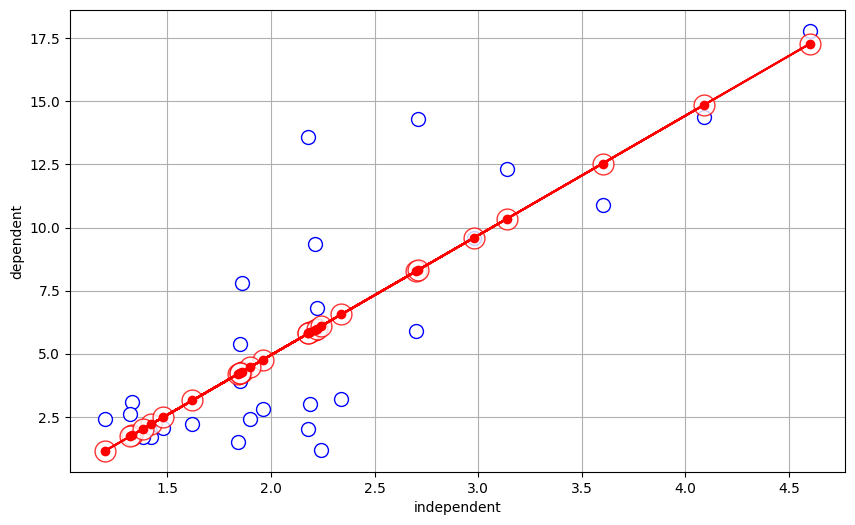

In [25]:
plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'bo',markersize=10,markerfacecolor='w')
# linear regression line
plt.plot(df['x'],y_pred,'ro',markersize=15,markerfacecolor='w',alpha=0.8)
plt.plot(df['x'],y_pred,'r')
plt.plot(df['x'],y_pred,'ro')


plt.xlabel('independent')
plt.ylabel('dependent')
plt.grid()
plt.show()

### Linear Regression with Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


In [ ]:
X = df.iloc[:,:-1].values # converting to array
y = df.iloc[:,-1].values

X.shape,y.shape

((27, 1), (27,))

In [ ]:
model = LinearRegression()
model.fit(X,y)
print('Model trained or fitted sucessfully')

Model trained or fitted sucessfully


In [ ]:
# intercept , slope
model.intercept_ , model.coef_

(-4.539688963978512, array([4.74352711]))

In [ ]:
# prediction
y_pred_sk = model.predict(X)

In [ ]:
test = np.array([3]).reshape(-1,1)

model.predict(test)

array([9.69089236])

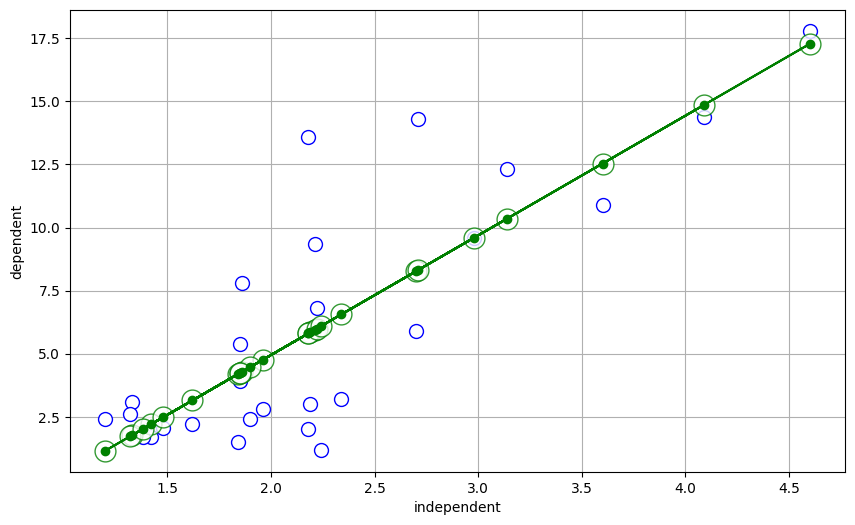

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'bo',markersize=10,markerfacecolor='w')
# linear regression line
plt.plot(df['x'],y_pred_sk,'go',markersize=15,markerfacecolor='w',alpha=0.8)
plt.plot(df['x'],y_pred_sk,'g')
plt.plot(df['x'],y_pred_sk,'go')


plt.xlabel('independent')
plt.ylabel('dependent')
plt.grid()
plt.show()

### Linear Regression with Statsmodel

In [26]:
# OLS
import statsmodels.api as sm

In [27]:
df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


In [29]:
# linear regression : oridinary least square regression (OLS)
model_sm = sm.OLS.from_formula(formula='y~x',data=df).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           2.50e-07
Time:                        19:14:01   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5397      1.619     -2.805      0.0

In [30]:
test_data = pd.DataFrame([[3]],columns=['x'])
model_sm.predict(test_data)

,0
0,9.690892


In [31]:
fittedvalue = model_sm.fittedvalues

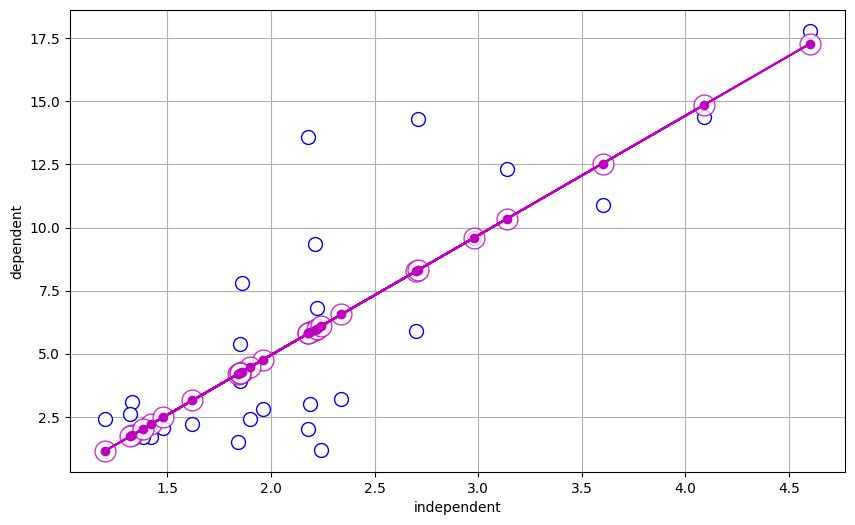

In [32]:
plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'bo',markersize=10,markerfacecolor='w')
# linear regression line
plt.plot(df['x'],fittedvalue,'mo',markersize=15,markerfacecolor='w',alpha=0.8)
plt.plot(df['x'],fittedvalue,'m')
plt.plot(df['x'],fittedvalue,'mo')


plt.xlabel('independent')
plt.ylabel('dependent')
plt.grid()
plt.show()

### Model Evalaution
- SST, SSR, SSE
- MSE
- $R^2$

In [33]:
# df['y']
def sum_of_square(y_value):
  mean_y = y_value.mean()
  ss = np.sum(np.square(y_value - mean_y))
  return ss

In [34]:
SST = sum_of_square(df['y'])
print(SST)

632.0708000000001


In [35]:
SSR = sum_of_square(fittedvalue)
print(SSR)

418.18650368895675


In [36]:
#SSE = SST - SSR
SSE = np.sum(np.square(df['y'] - fittedvalue))
print(SSE)

213.8842963110432


In [37]:
SST - SSR

213.88429631104333

In [38]:
# MSE ( Mean Square Square)
n = len(df)
k = 1 # no. of independent variable
MSE = SSE / (n-k)
print(MSE)

8.226319088886276


In [39]:
# R-square (explained varianc)
R_square = SSR / SST
print(R_square)

0.6616133883877513


---
*datascienceanywhere*

Notes:http://www.datascienceanywhere.com/timeseries

Additional Reference: http://www.datascienceanywhere.com/2020/09/25/how-to-test-evaluate-linear-regression-statistically/